# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [19]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [20]:
# Adicionar uma constante para a interceptação
X = sm.add_constant(tips['net_bill'])
y = tips['tip']

# Ajustar o modelo de regressão
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           5.02e-23
Time:                        16:58:52   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3307      0.168      7.907      0.0

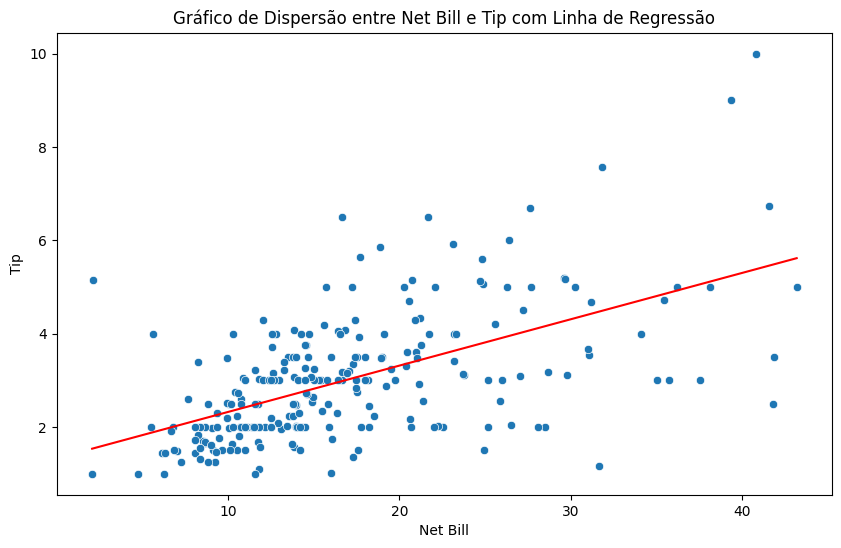

In [21]:
# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip', data=tips)
sns.lineplot(x=tips['net_bill'], y=model.predict(X), color='red')
plt.xlabel('Net Bill')
plt.ylabel('Tip')
plt.title('Gráfico de Dispersão entre Net Bill e Tip com Linha de Regressão')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [22]:
# Adicionar uma constante para a interceptação
X = sm.add_constant(tips['net_bill'])
y = tips['tip_pct']

# Ajustar o modelo de regressão
model_tip_pct = sm.OLS(y, X).fit()

# Resumo do modelo
print(model_tip_pct.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.52e-06
Time:                        16:58:53   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.023     13.166      0.0

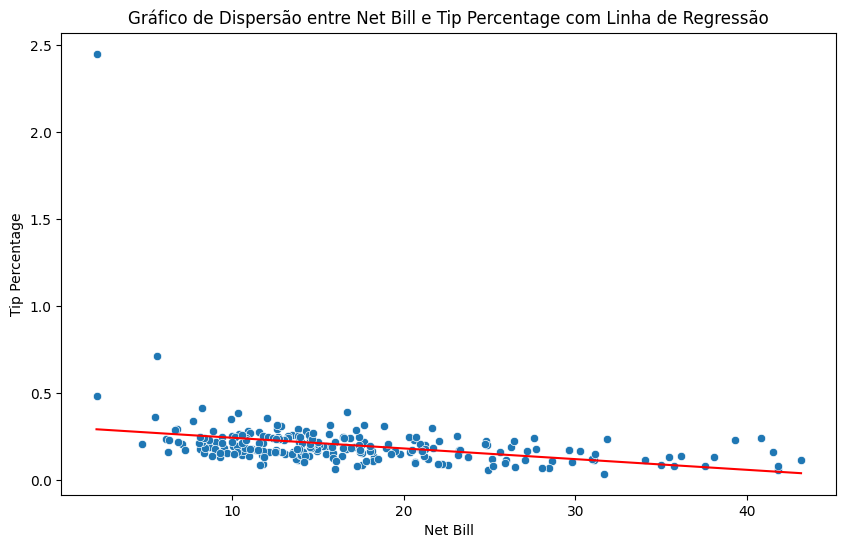

In [23]:
# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
sns.lineplot(x=tips['net_bill'], y=model_tip_pct.predict(X), color='red')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Gráfico de Dispersão entre Net Bill e Tip Percentage com Linha de Regressão')
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

**Comparação dos Gráficos**
Gráfico de Dispersão: net_bill vs tip
Relação Direta: Mostra a relação direta entre o valor líquido da conta (net_bill) e a gorjeta (tip).

**Linha de Regressão**: Indica como a gorjeta aumenta conforme o valor líquido da conta aumenta.

**R²**: Proporção da variação na gorjeta explicada pelo valor líquido da conta.

Gráfico de Dispersão: **negrito** net_bill vs tip_pct
Relação Percentual: Mostra a relação entre o valor líquido da conta (net_bill) e a porcentagem da gorjeta (tip_pct).

**Linha de Regressão**: Mostra como a porcentagem da gorjeta varia com o valor líquido da conta, frequentemente com tendência decrescente à medida que o valor da conta aumenta.

**R²**: Proporção da variação na porcentagem da gorjeta explicada pelo valor líquido da conta.

**Diferença do Ajuste**
**net_bill vs tip:** O ajuste linear é mais direto, representando a relação absoluta entre a conta líquida e a gorjeta. Geralmente, a linha de regressão mostra um aumento linear na gorjeta conforme o valor da conta aumenta.

**net_bill vs tip_pct:  **O ajuste linear pode mostrar uma relação mais complexa, pois a porcentagem da gorjeta pode não crescer linearmente com o valor da conta líquida. A linha de regressão pode indicar uma tendência decrescente, mostrando que a porcentagem da gorjeta diminui à medida que o valor da conta aumenta.

**Comparação dos R²**
Comparação Direta:* Não é adequado comparar diretamente os valores de R² *entre essas duas regressões, *texto em itálico* pois estamos analisando métricas diferentes (valor absoluto vs porcentagem).

R² no Modelo tip vs net_bill: Mostra a proporção da variação na gorjeta explicada pelo valor da conta líquida.

R² no Modelo tip_pct vs net_bill: Mostra a proporção da variação na porcentagem da gorjeta explicada pelo valor da conta líquida.

Cada R² deve ser interpretado no contexto do modelo específico, considerando as variáveis envolvidas.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [24]:
# Obter os valores preditos para tip_pct
tip_pct_pred = model_tip_pct.fittedvalues

In [25]:
# Obter os valores preditos para tip
tip_pred = tip_pct_pred * tips['net_bill']

In [26]:
# Calcular o R² do modelo para tip
r2_tip = r2_score(tips['tip'], tip_pred)

print(f"R² do modelo para tip: {r2_tip:.4f}")


R² do modelo para tip: 0.1089


In [27]:
# R² do modelo original (tip vs net_bill) obtido anteriormente
r2_original = model.rsquared

print(f"R² do modelo original (tip vs net_bill): {r2_original:.4f}")
print(f"R² do modelo ajustado (tip_pct vs net_bill): {r2_tip:.4f}")


R² do modelo original (tip vs net_bill): 0.3325
R² do modelo ajustado (tip_pct vs net_bill): 0.1089
